# Business Understanding

   Streaming services have proven themselves worthy competitors against the long-standing "gatekeepers of film" - movie theaters. These competitors are alike in that they provide similar products and their goal is to make money, but a distinct difference between their business models is the WAY they make money. Movies at the theater make money through ticket sales, a one time payment in exchange for a one time expereince of the product. Streaming services make their money through subscriptions, a monthly payments that allows the viewer unlimited access to the product(s). This distinction is important to understand when analyzing the success of a particular film. 
    It is easy to determine the success of a movie in the theater. All one must do is compare the budget of the film to the total amount of money the film grossed. Ticket sales provides you with a concrete answer to the question, "Was my film a success?"
    Streaming services however, are more complicated. Streamers pay a subscription in exchange for access to the collective hub of films owned by the company. As such, it is far more difficult to directly relate a specific movie to the services success. We cannot compare the budget of the film to the total grossed, because there is not variable, like tickets, to measure the total grossed. Subscriptions are the key. Instead, we ask ourselves, "How do we entice people to sign up for our service?" To answer this question, we will analyze:
    1. Movie budgets and the correlation to the films financial success.
    2. Popularity

# Data Understanding

## Data Preparation

In [368]:
!ls zippedData/

bom.movie_gross.csv     im.db 2                 rt.reviews.tsv.gz
bom.movie_gross.csv.gz  im.db.zip               tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [369]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [370]:
# How much does the budget affect success? (budget vs total gross)
# What genre(s) should they focus on for their movie? (genre vs poularity and vote counts)
# What Month of year should they release it? (Month vs popularity)



In [371]:
con = sqlite3.connect('zippedData/im.db')

In [372]:
cursor = con.cursor()

In [373]:
BOM_data = pd.read_csv('zippedData/bom.movie_gross.csv')

In [374]:
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [375]:
TN_data = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [376]:
TMDB_data['release_date'] = pd.to_datetime(TMDB_data['release_date'])

In [377]:
BOM_data['foreign_gross'] = BOM_data['foreign_gross'].str.replace(',','')

In [378]:
BOM_data['foreign_gross']= BOM_data['foreign_gross'].astype(float)

In [379]:
BOM_data["total gross"] = BOM_data['domestic_gross'] + BOM_data['foreign_gross']

In [380]:
TMDB_data["genre_ids"] = TMDB_data["genre_ids"].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [381]:
TMDB_genre = TMDB_data.explode(column="genre_ids")

In [382]:
vote_count = TMDB_data.sort_values('vote_count', ascending = False).head(10)

In [383]:
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)

In [384]:
# Question 1: is it a worth invenstment and who should I invest with? 
studios = BOM_data.groupby('year')['total gross'].mean().sort_values(ascending=False).head(10)
studios

year
2017    1.720096e+08
2018    1.632303e+08
2016    1.554744e+08
2015    1.363117e+08
2013    1.356955e+08
2014    1.158318e+08
2012    1.139953e+08
2011    8.791040e+07
2010    7.937058e+07
Name: total gross, dtype: float64

In [385]:
BOM_data = BOM_data.dropna()


In [386]:
BOM_data

,title,studio,domestic_gross,foreign_gross,year,total gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [387]:
total_gross = BOM_data.sort_values("total gross", ascending = False)
total_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year,total gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [388]:
# There are two connections between the top 4: They are all Action/Science Fiction
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)


In [403]:
type(genres)

pandas.core.series.Series

In [389]:
lst_of_genres = ['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction', 'Thriller', 'Mystery', 'Family', 'Animation'] 

In [405]:
genres.index = lst_of_genres

In [406]:
genres.index
    
    

Index(['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction',
       'Thriller', 'Mystery', 'Family', 'Animation'],
      dtype='object')

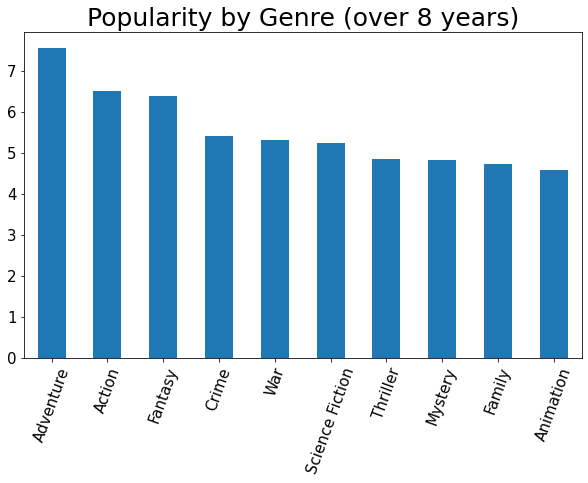

In [423]:
x = genres.index
y = genres.values
plt.figure(figsize=(10,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Popularity by Genre (over 8 years)", fontsize=25)
ax= genres.plot.bar(x=x, y=y, rot=70)



In [ ]:
TMDB_data

In [ ]:
# There are two connections between the top 4: They are all Action/Science Fiction
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)
genres

In [ ]:
TMDB_genre

In [ ]:
TMDB_data['release_date'] = pd.to_datetime(TMDB_data['release_date'])
        